In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Dropout

In [ ]:
!unzip /content/drive/MyDrive/road_sign/70k_bgr.zip

In [ ]:
!rsync -av /content/content/razm_70k/5.14.1/ /content/content/razm_70k/5.14

In [ ]:
!rm -rf /content/content/razm_70k/5.14.1

## Classes

In [ ]:
# 
classes = ['8.8','4.2.3','8.2.2','2.1','3.2','5.16','1.23','скорость','8.2.3','5.6','2.5',
           '5.15.3','5.19.2','8.2.1','5.19.1','5.15.4','8.17','6.4','3.1','5.15.2',
           '2.4','8.6.1','8.4.3','5.14','4.2.1','4.1.4','6.16','5.15.1','5.17','4.2.2','4.1.2','6.6.1',
           '8.3.1','6.3.1','8.22.1','5.3','5.20','8.4.1','4.1.1','3.28','8.6.5','1.17','8.22.2','3.27',
           '5.15.5','5.21','8.14','5.5','1.25','8.2.4','3.4','8.22.3','высота','1.15','Ж','Б','8.24',
           '3.10','1.34.1','1.34.2','1.20.3','1.20.2'] #добавленные классы
classes.sort()
len_classes = len(classes)
len_classes

62


## Unique


In [ ]:
from collections import Counter
Counter(classes)

Counter({'1.15': 1,
         '1.17': 1,
         '1.20.2': 1,
         '1.20.3': 1,
         '1.23': 1,
         '1.25': 1,
         '1.34.1': 1,
         '1.34.2': 1,
         '2.1': 1,
         '2.4': 1,
         '2.5': 1,
         '3.1': 1,
         '3.10': 1,
         '3.2': 1,
         '3.27': 1,
         '3.28': 1,
         '3.4': 1,
         '4.1.1': 1,
         '4.1.2': 1,
         '4.1.4': 1,
         '4.2.1': 1,
         '4.2.2': 1,
         '4.2.3': 1,
         '5.14': 1,
         '5.15.1': 1,
         '5.15.2': 1,
         '5.15.3': 1,
         '5.15.4': 1,
         '5.15.5': 1,
         '5.16': 1,
         '5.17': 1,
         '5.19.1': 1,
         '5.19.2': 1,
         '5.20': 1,
         '5.21': 1,
         '5.3': 1,
         '5.5': 1,
         '5.6': 1,
         '6.16': 1,
         '6.3.1': 1,
         '6.4': 1,
         '6.6.1': 1,
         '8.14': 1,
         '8.17': 1,
         '8.2.1': 1,
         '8.2.2': 1,
         '8.2.3': 1,
         '8.2.4': 1,
         '8.22.1

## Колличество классов

In [ ]:
files = []
path = "/content/content/razm_70k"
for file in os.listdir(path):
    files.append(file)

#files

In [ ]:
imgs_path = "/content/content/razm_70k"
data = []
labels = []
len_classes = len(classes)
for i in range(len_classes):
    p = os.path.join(imgs_path, classes[i]) #0-26
    print(p)
    for img in os.listdir(p):
      if img.endswith(".jpg"):
        im = Image.open(p + '/' + img)
        im = im.resize((30,30))
        im = np.array(im)
        data.append(im)
        labels.append(i)
      #im = Image.open(p + '/' + img)
data = np.array(data)
labels = np.array(labels)
print("success")

/content/content/razm_70k/1.15
/content/content/razm_70k/1.17
/content/content/razm_70k/1.20.2
/content/content/razm_70k/1.20.3
/content/content/razm_70k/1.23
/content/content/razm_70k/1.25
/content/content/razm_70k/1.34.1
/content/content/razm_70k/1.34.2
/content/content/razm_70k/2.1
/content/content/razm_70k/2.4
/content/content/razm_70k/2.5
/content/content/razm_70k/3.1
/content/content/razm_70k/3.10
/content/content/razm_70k/3.2
/content/content/razm_70k/3.27
/content/content/razm_70k/3.28
/content/content/razm_70k/3.4
/content/content/razm_70k/4.1.1
/content/content/razm_70k/4.1.2
/content/content/razm_70k/4.1.4
/content/content/razm_70k/4.2.1
/content/content/razm_70k/4.2.2
/content/content/razm_70k/4.2.3
/content/content/razm_70k/5.14
/content/content/razm_70k/5.15.1
/content/content/razm_70k/5.15.2
/content/content/razm_70k/5.15.3
/content/content/razm_70k/5.15.4
/content/content/razm_70k/5.15.5
/content/content/razm_70k/5.16
/content/content/razm_70k/5.17
/content/content/razm

## Classes info

In [ ]:
sign_count = []
for i in range(len(classes)):
    counter = 0
    p = os.path.join(imgs_path, classes[i]) #0-26
    for img in os.listdir(p):
      if img.endswith(".jpg"):
        counter+=1
    sign_count.append(counter)
    # print(f'{p} ------ {counter}')
#counter

In [ ]:
d = {'sign_number': classes, 'count': sign_count}
df = pd.DataFrame(data=d)
df = df.sort_values(by=['count'],ascending=False)
df

,sign_number,count
14,3.27,9816
40,6.4,7515
31,5.19.1,6646
32,5.19.2,5812
51,8.24,4604
...,...,...
46,8.2.3,76
35,5.3,76
2,1.20.2,75
7,1.34.2,52


In [ ]:
import seaborn as sns
plt.style.use('ggplot')

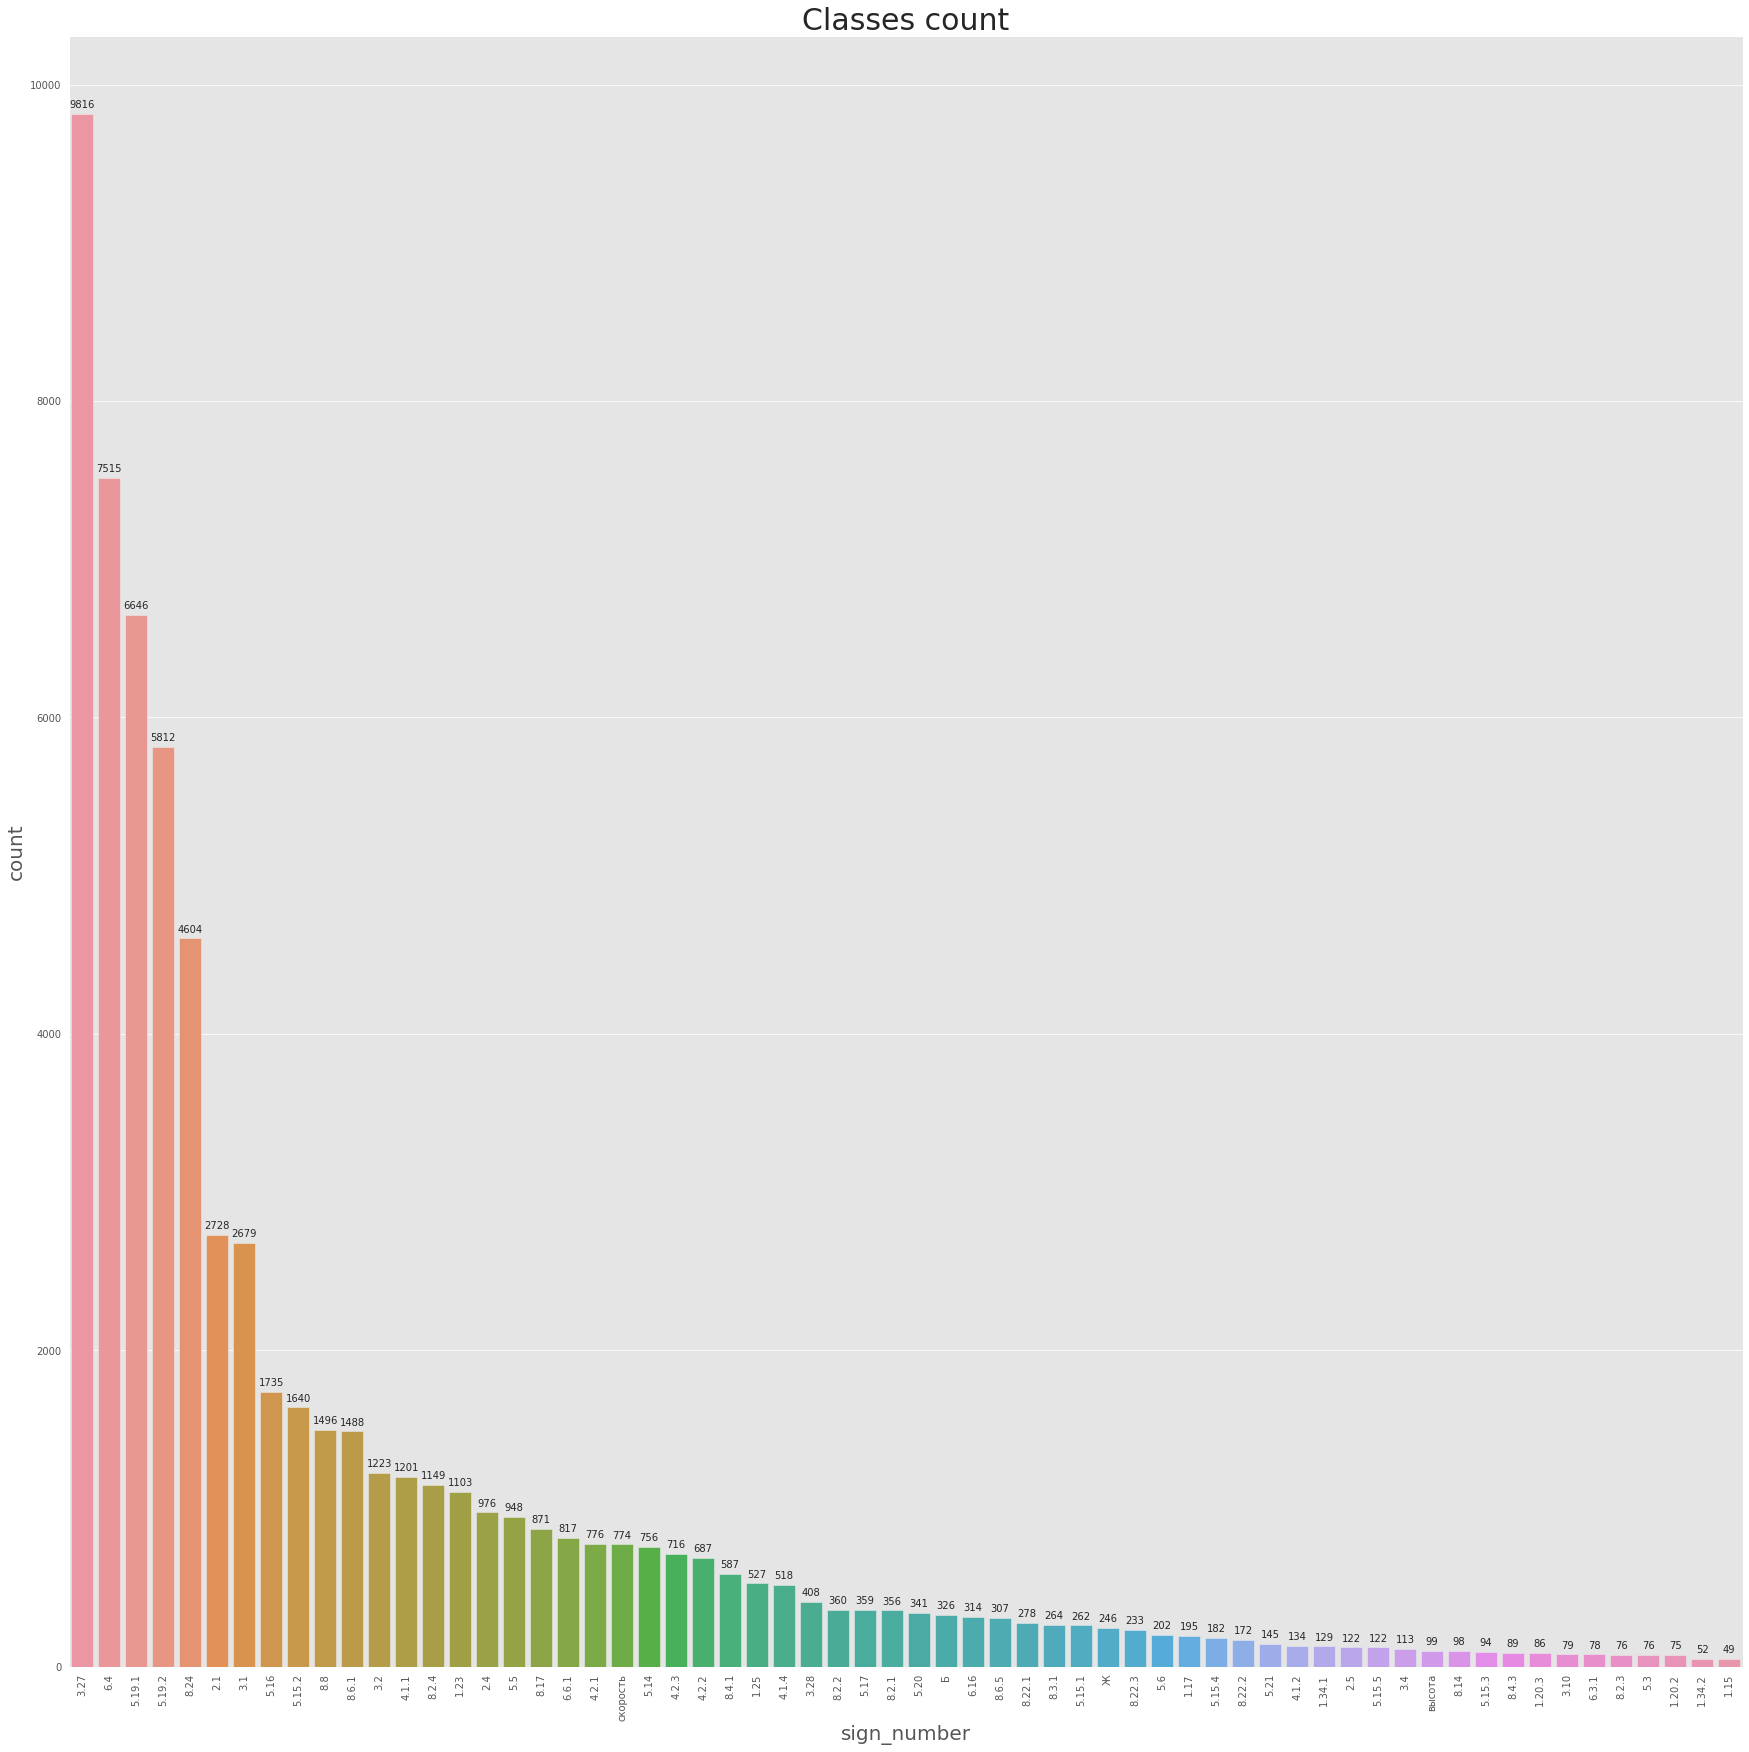

In [ ]:
fig_dims = (30, 30)
fig, ax = plt.subplots(figsize=fig_dims)
splot = sns.barplot(data=df, x="sign_number", y="count",ax=ax)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xticks(rotation=90)
plt.xlabel("sign_number", size=20)
plt.ylabel("count", size=20)
plt.title('Classes count', size=30)
plt.show()

## Check images

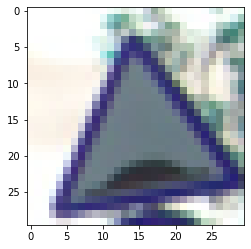

In [ ]:
i0 = "/content/Размеченое/1.17/21f6ea48-dab3-408b-a525-e563624f9609.jpg"
i = Image.open(i0)
i = i.resize((30, 30))
sr = np.array(i)  #it is a matrix of shape (30,30,3)
plt.imshow(i)
plt.show()

In [ ]:
print(data.shape)
print(labels.shape)


(30856, 30, 30, 3)
(30856,)


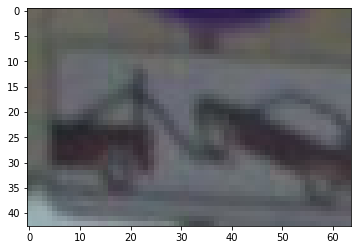

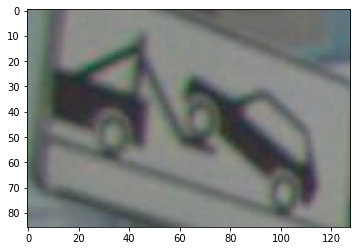

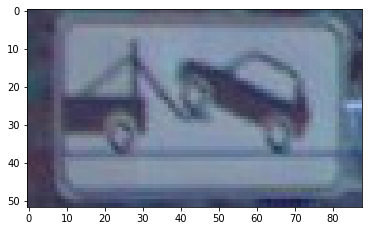

In [ ]:
ipath = "/content/Размеченое/8.24"
imgs = os.listdir(ipath)
for ip in imgs[5:8]:
    im = Image.open(ipath +'/'+ip)
    plt.imshow(im)
    plt.show()

## Data split

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print("training shape: ",x_train.shape, y_train.shape)
print("testing shape: ",x_test.shape, y_test.shape)

y_train = to_categorical(y_train, len_classes)
y_test = to_categorical(y_test, len_classes)

training shape:  (53047, 30, 30, 3) (53047,)
testing shape:  (13262, 30, 30, 3) (13262,)


## CNN model

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Activation, Flatten, Dropout
from keras.layers import Dense

In [ ]:
x_train.shape[1:]

(30, 30, 3)

In [ ]:
def model_load():
  model = Sequential()
  model.add(Conv2D(filters=32, kernel_size=(5,5), activation="relu", input_shape=(30, 30, 3)))
  model.add(Conv2D(filters=32, kernel_size=(5,5), activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(rate=0.25))
  model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
  model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(rate=0.25))
  model.add(Flatten())
  model.add(Dense(256, activation="relu"))
  model.add(Dropout(rate=0.5))
  model.add(Dense(len_classes, activation="softmax"))
  return model

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 64)          0

## DataGEN

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=20,  # randomly rotate images in the range (degrees, 0 to 180)
        #zoom_range = 0.1, # Randomly zoom image 
        #width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        #height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

## Model fit

In [ ]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1, factor=0.5, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', patience=8, verbose=1, mode='min')

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
epochs = 25
batch_size = 86
history = model.fit(datagen.flow(x_train,y_train, batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    steps_per_epoch=x_train.shape[0] // batch_size,
                    callbacks=[early_stopping, learning_rate_reduction]
                    )

Epoch 1/25
616/616 [==============================] - 64s 57ms/step - loss: 1.5870 - accuracy: 0.6446 - val_loss: 0.4528 - val_accuracy: 0.8893
Epoch 2/25
616/616 [==============================] - 35s 56ms/step - loss: 0.5596 - accuracy: 0.8575 - val_loss: 0.2361 - val_accuracy: 0.9428
Epoch 3/25
616/616 [==============================] - 35s 56ms/step - loss: 0.4029 - accuracy: 0.8987 - val_loss: 0.2101 - val_accuracy: 0.9484
Epoch 4/25
616/616 [==============================] - 35s 56ms/step - loss: 0.3384 - accuracy: 0.9140 - val_loss: 0.1622 - val_accuracy: 0.9631
Epoch 5/25
616/616 [==============================] - 36s 58ms/step - loss: 0.3045 - accuracy: 0.9242 - val_loss: 0.2031 - val_accuracy: 0.9523
Epoch 6/25
616/616 [==============================] - 35s 57ms/step - loss: 0.2763 - accuracy: 0.9306 - val_loss: 0.1291 - val_accuracy: 0.9713
Epoch 7/25
616/616 [==============================] - 36s 58ms/step - loss: 0.2578 - accuracy: 0.9357 - val_loss: 0.1218 - val_accuracy:

## Fit Visualization

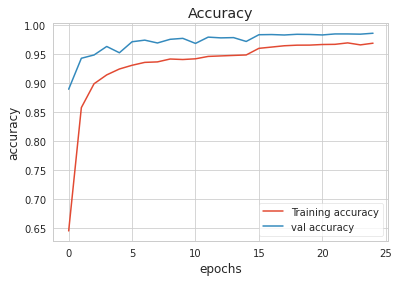

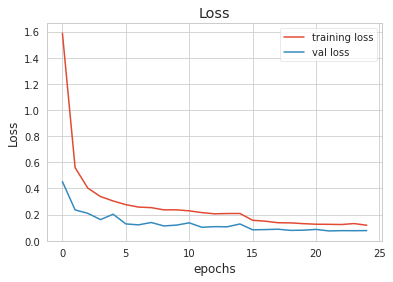

In [ ]:
import seaborn as sns
sns.set_style("whitegrid")
plt.figure(0)
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="val accuracy")
plt.title("Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label="training loss")
plt.plot(history.history['val_loss'], label="val loss")
plt.title("Loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
# save model
model.save('/content/drive/MyDrive/Road_sign_classifier/62_classes_road_sign_classifier_best.h5')

## Predict

In [ ]:
predictions = model.predict(x_test)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

In [ ]:
y_classes = [np.argmax(y, axis=None, out=None) for y in y_test]

## Error analysis 

In [ ]:
def display_examples(class_names, images, labels,mult):
    """
        Display 25 images from the images array with its corresponding labels
    """
    
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    counter = 0
    #step = mult
    if mult ==1:
      mult = 0
    for i in range(25*mult,25*mult+25,1):
      
        plt.subplot(5,5,counter+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
        counter+=1
    plt.show()

def print_mislabeled_images(class_names, test_images, test_labels, pred_labels,mult):
    """
        Print 25 examples of mislabeled images by the classifier, e.g when test_labels != pred_labels
    """
    BOO = (test_labels == pred_labels)
    mislabeled_indices = np.where(BOO == 0)
    mislabeled_images = test_images[mislabeled_indices]
    mislabeled_labels = pred_labels[mislabeled_indices]

    title = "Some examples of mislabeled images by the classifier:"
    display_examples(class_names,  mislabeled_images, mislabeled_labels,mult)
  

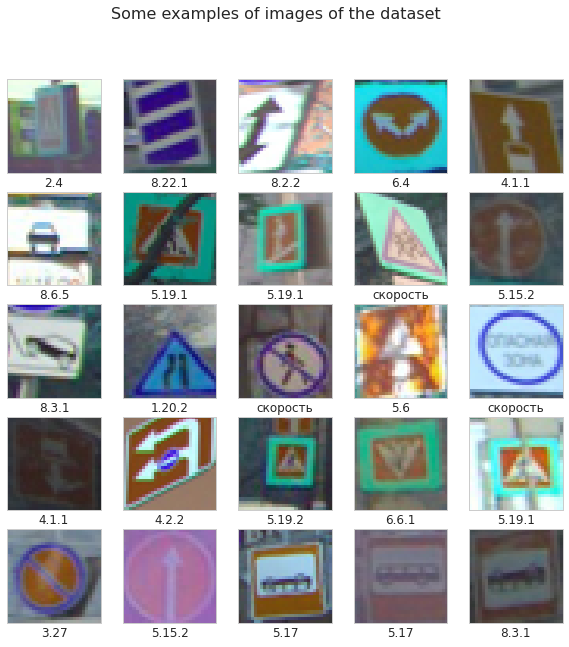

In [ ]:
print_mislabeled_images(classes, x_test, y_classes, pred_labels,4)

## Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

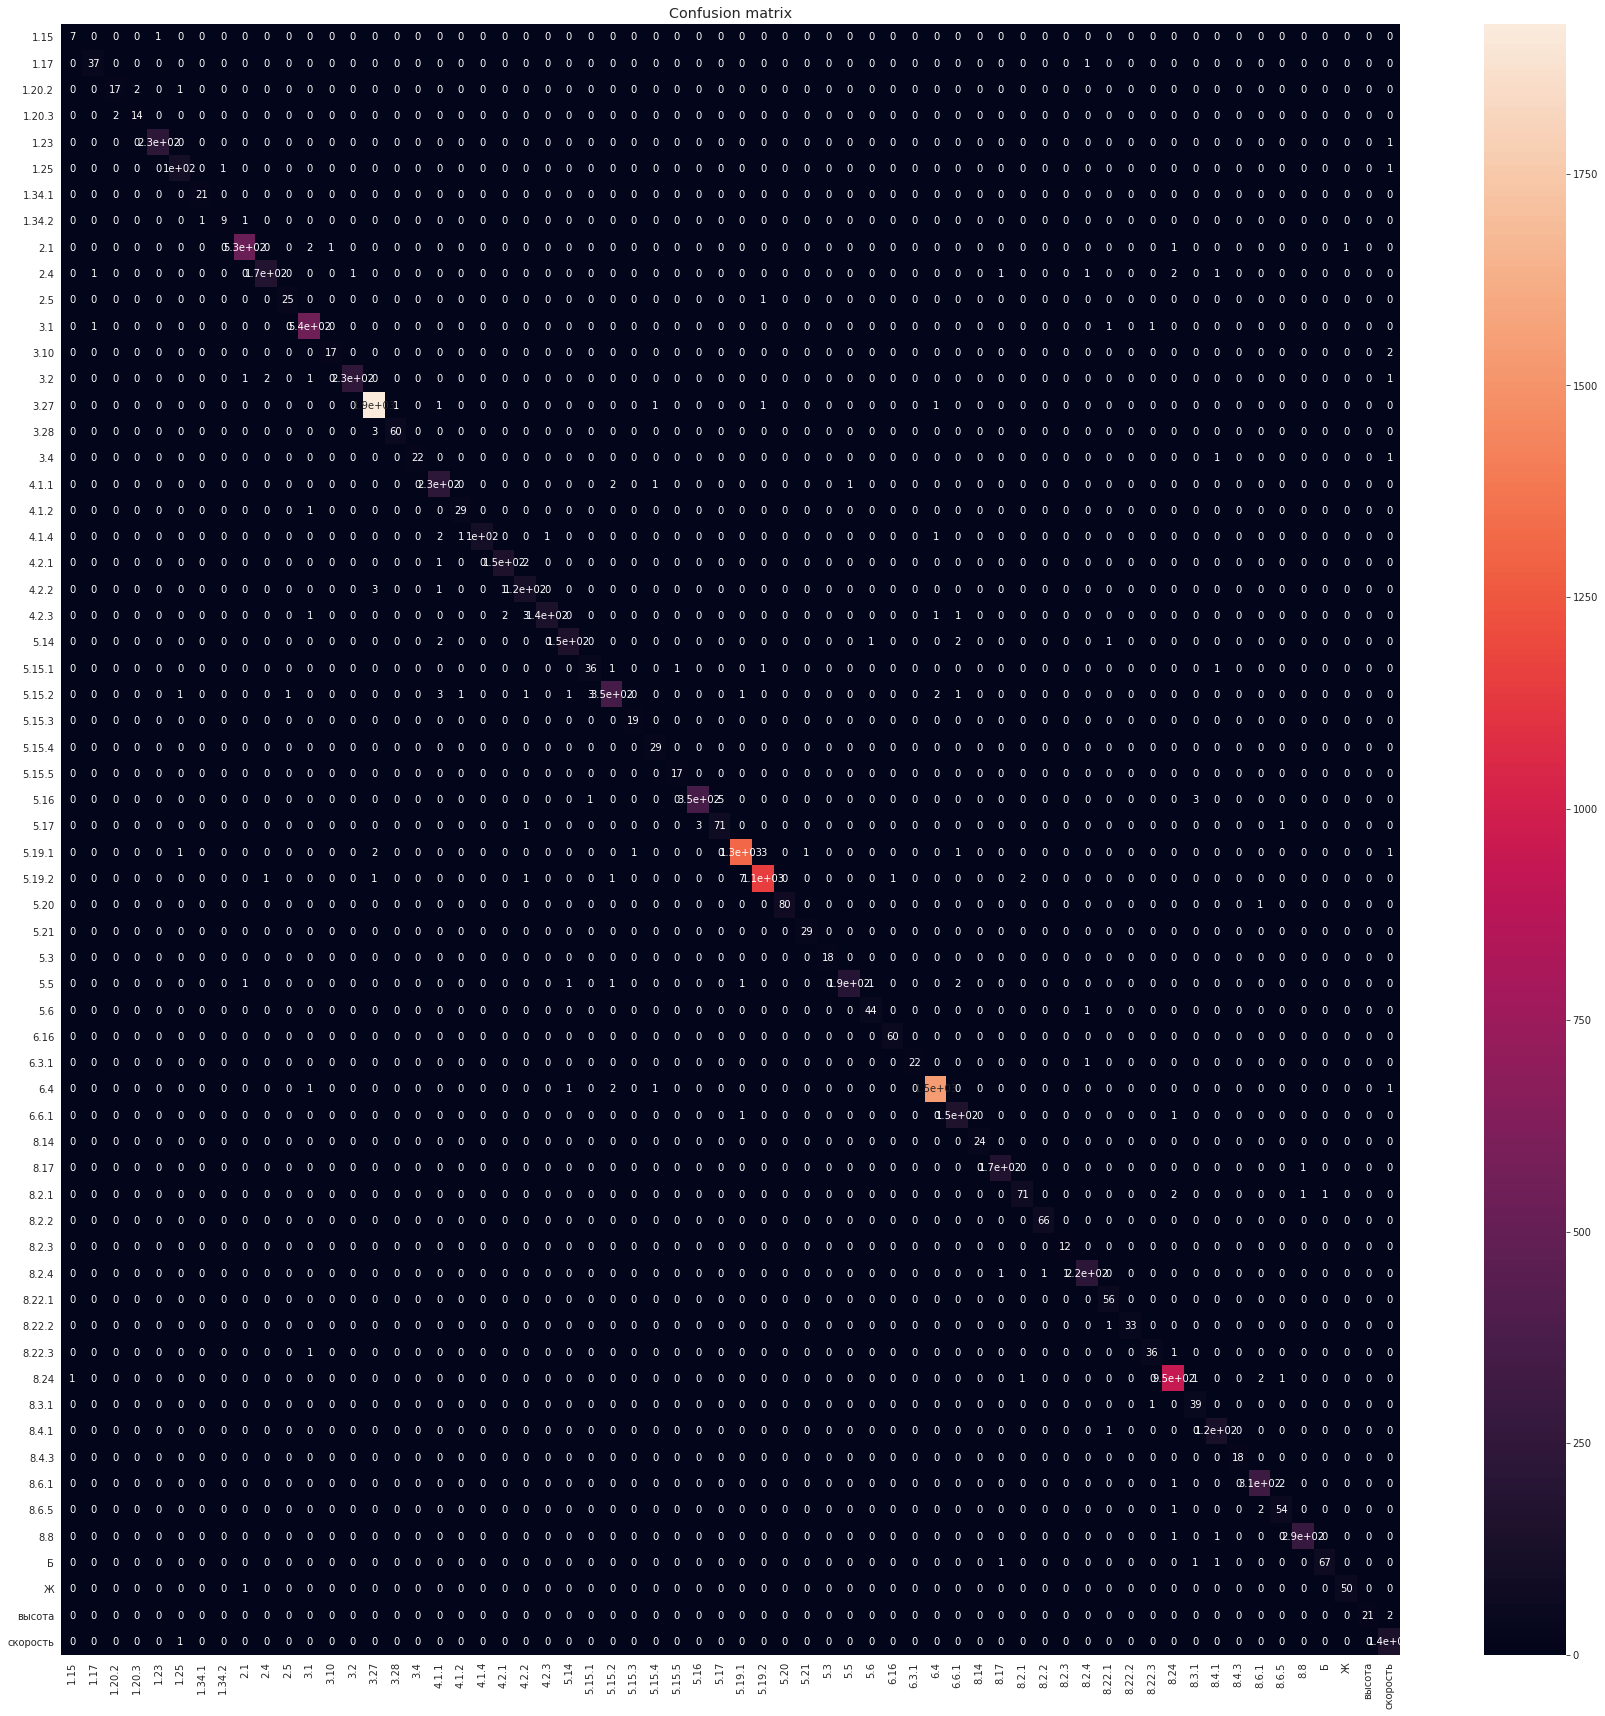

In [ ]:
CM = confusion_matrix(y_classes, pred_labels)

fig_dims = (30, 30)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=classes, 
           yticklabels=classes, ax = ax)
ax.set_title('Confusion matrix')

plt.show()

In [ ]:
df[df['sign_number']=='8.2.4']

,sign_number,count
114,8.2.4,1149


## Test

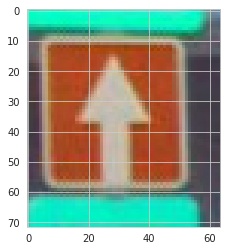

[[4.9929902e-22 2.8987169e-16 2.2260343e-25 3.2469138e-14 1.2134119e-19
  2.4051304e-15 6.5970615e-18 3.0921795e-19 1.5741084e-21 1.0648797e-06
  4.9709017e-24 2.0812784e-13 2.8722489e-13 4.8899001e-23 2.0297020e-10
  1.5397652e-11 3.7296806e-12 4.7356481e-20 2.7531731e-13 3.3241956e-15
  3.6353629e-08 1.5487617e-17 8.1952318e-15 3.2590972e-27 3.2719179e-14
  2.1140791e-12 1.4432727e-08 6.8170595e-23 1.1522226e-13 4.1282434e-17
  1.8264901e-16 1.8127185e-16 6.8388832e-09 2.8350399e-22 2.7952050e-18
  6.7971240e-21 3.7300862e-23 7.5265676e-11 1.9782580e-20 1.9358346e-07
  6.6560901e-17 1.1411492e-17 8.8361274e-19 4.1326941e-21 5.2004432e-25
  6.4269154e-16 5.7333818e-16 1.2029191e-13 1.1819539e-25 9.9999869e-01
  1.5142358e-17 5.4150386e-17 2.8798175e-29 1.1854022e-20 5.2942620e-32
  2.4385321e-26 2.6454753e-20 2.9329987e-23 3.8557080e-15 2.1186680e-24
  7.0006850e-25]]


In [ ]:
test_data = []
im = Image.open('/content/0afd67dd-1345-448e-bc44-d9cc130d63e7.jpg')
plt.imshow(im)
plt.show()
r, g, b = im.split()
im = Image.merge("RGB", (b, g, r))

im = im.resize((30,30))
im = np.array(im)
test_data.append(im)

test_data = np.array(test_data)

predictions = model.predict(test_data)
print(predictions)
#print(classes[predictions[0]])
#print(model.predict_proba(test_data)[0][predictions[0]])

In [ ]:
predictions.max()

0.9999987

In [ ]:
classes[predictions.argmax()]

'5.5'

In [ ]:
predictions = model.predict_classes(test_data)
print(predictions)
print(classes[predictions[0]])
print(model.predict_proba(test_data)[0][predictions[0]])

[5]
5.16
0.9986291


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


In [ ]:
# определенное кол-во знаков после запятой
def toFixed(numObj, digits=0):
    return f"{numObj:.{digits}f}"

In [ ]:
for i in range(len_classes):
    p = os.path.join(imgs_path, classes[i]) #0-25
    print(f'{p[18:]} ---- {toFixed(model.predict(test_data)[0][i],4)}')

8.8 ---- 0.0000
4.2.3 ---- 0.0000
8.2.2 ---- 0.0000
2.1 ---- 0.0000
3.2 ---- 0.0000
5.16 ---- 0.0000
1.23 ---- 0.0000
скорость ---- 0.0000
8.2.3 ---- 0.0000
5.6 ---- 0.0000
2.5 ---- 0.0000
5.15.3 ---- 0.0000
5.19.2 ---- 0.0000
8.2.1 ---- 0.0000
5.14.1 ---- 0.0001
5.19.1 ---- 0.0000
5.15.4 ---- 0.0000
8.17 ---- 0.0000
6.4 ---- 0.0000
3.1 ---- 0.0000
5.15.2 ---- 0.0000
2.4 ---- 0.0000
8.6.1 ---- 0.9999
8.4.3 ---- 0.0000
5.14 ---- 0.0000
4.2.1 ---- 0.0000
4.1.4 ---- 0.0000
6.16 ---- 0.0000
5.15.1 ---- 0.0000
5.17 ---- 0.0000
4.2.2 ---- 0.0000
4.1.2 ---- 0.0000
6.6.1 ---- 0.0000
8.3.1 ---- 0.0000
6.3.1 ---- 0.0000
8.22.1 ---- 0.0000
5.3 ---- 0.0000
5.20 ---- 0.0000
8.4.1 ---- 0.0000
4.1.1 ---- 0.0000
8.2.4 ---- 0.0000
3.28 ---- 0.0000
8.6.5 ---- 0.0000
1.17 ---- 0.0000
8.22.2 ---- 0.0000
3.27 ---- 0.0000
5.15.5 ---- 0.0000
5.21 ---- 0.0000
8.14 ---- 0.0000
5.5 ---- 0.0000
1.25 ---- 0.0000
8.2.4 ---- 0.0000
3.4 ---- 0.0000
8.22.3 ---- 0.0000
высота ---- 0.0000
1.15 ---- 0.0000


In [ ]:
model.save('/content/drive/MyDrive/Road_sign_classifier/59_classes_road_sign_classifier.h5')

In [ ]:
model.load_weights('/content/drive/MyDrive/Road_sign_classifier/59_classes_road_sign_classifier.h5')

## Classification



In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Activation, Flatten, Dropout
from keras.layers import Dense

from PIL import Image
import numpy as np
import os

In [ ]:
len_classes = 62
model = model_load()
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
model.load_weights('/content/drive/MyDrive/Road_sign_classifier/62_classes_road_sign_classifier_best.h5')

In [ ]:
import shutil

In [ ]:
!mkdir 'raw_img'

In [ ]:
!mkdir 'marked'

In [ ]:
!unzip /content/drive/MyDrive/cropped/sign_4_5.zip -d /content/raw_img

In [ ]:
## если проблемы с путями
!mv /content/raw_img/content/bbox_sign_3 -r /content/raw_img/

In [ ]:
!rm -rf /content/raw_img/content

In [ ]:
home_path = '/content/raw_img/content/sign_4_5'
path_out = '/content/marked'
dir = [ ]
for file in os.listdir(home_path):
    if file.endswith(".jpg"):
      dir.append(file)
len(dir)

3219

In [ ]:
os.mkdir(path_out+'/'+'hz')

In [ ]:
#os.mkdir(path_out+'/'+'hz')
counter = 0
for el in dir:
  counter+=1
  print(counter)
  test_data = []
  im = Image.open(home_path+'/'+el)

  r, g, b = im.split()
  im = Image.merge("RGB", (b, g, r))

  im = im.resize((30,30))
  im = np.array(im)
  test_data.append(im)

  test_data = np.array(test_data)

  predictions = model.predict(test_data)
  
  if predictions.max()*100<50:
    shutil.move(home_path+'/'+el, path_out+'/'+'hz/')
  else:
    try:
      os.mkdir(path_out+'/'+classes[predictions.argmax(axis=1)[0]])
    except Exception:
      pass
    shutil.move(home_path+'/'+el, path_out+'/'+classes[predictions.argmax(axis=1)[0]]+'/'+el)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [ ]:
#зиповка результата
!zip -r sign_4_5.zip /content/marked/

  adding: content/marked/ (stored 0%)
  adding: content/marked/5.5/ (stored 0%)
  adding: content/marked/5.5/c94e9df9-315c-4b77-96f5-0d65e21c0b6e.jpg (deflated 8%)
  adding: content/marked/5.5/60bcce26-2631-4973-a2c6-1909103e9cb5.jpg (deflated 2%)
  adding: content/marked/5.5/c9c0cee8-e363-4e9b-a3d9-b4ebe2c0dd0a.jpg (deflated 7%)
  adding: content/marked/5.5/a0136a90-fe6f-4f87-82a5-28d0caa53d8e.jpg (deflated 3%)
  adding: content/marked/5.5/1388cd5f-a78d-4a19-ba28-314aeccc4f7e.jpg (deflated 6%)
  adding: content/marked/5.5/f94413ba-1c9b-4933-89fd-e4332047220e.jpg (deflated 14%)
  adding: content/marked/5.5/eb8b84f7-49a5-454b-9afe-235c4e20e584.jpg (deflated 2%)
  adding: content/marked/5.5/44161c52-e584-4789-9a6c-4a83da6d03c4.jpg (deflated 6%)
  adding: content/marked/5.5/83e2f415-378b-4bb9-83b7-460b2dc7be83.jpg (deflated 8%)
  adding: content/marked/5.5/30046544-b8cd-4b02-bd56-6df05abd7ec0.jpg (deflated 8%)
  adding: content/marked/5.5/909cf729-498d-4c97-857d-c0392c07a07d.jpg (deflated

In [ ]:
# удаление
!rm -r /content/marked/*

In [ ]:
# удаление
!rm -r /content/raw_img/*

## test os

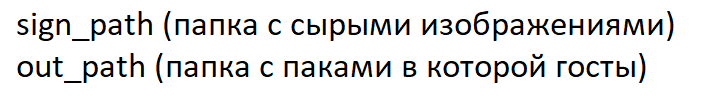


In [ ]:
import shutil # shell util

In [ ]:
!mkdir 'raw_img'

mkdir: cannot create directory ‘raw_img’: File exists


In [ ]:
!mkdir 'marked'

In [ ]:
!unzip /content/cropped.zip -d /content/raw_img

In [ ]:
home_path = '/content/raw_img/cropped'
path_out = '/content/marked'
dir = [ ]
for file in os.listdir(home_path):
    if file.endswith(".jpg"):
      dir.append(file)
len(dir)

19141

In [ ]:
os.mkdir(path_out+'/'+'hz')

In [ ]:
#os.mkdir(path_out+'/'+'hz')
counter = 0
for el in dir:
  counter+=1
  print(counter)
  test_data = []
  im = Image.open(home_path+'/'+el)

  r, g, b = im.split()
  im = Image.merge("RGB", (b, g, r))

  im = im.resize((30,30))
  im = np.array(im)
  test_data.append(im)

  test_data = np.array(test_data)

  predictions = model.predict(test_data)
  
  if predictions.max()*100<68:
    shutil.move(home_path+'/'+el, path_out+'/'+'hz/')
  else:
    try:
      os.mkdir(path_out+'/'+classes[predictions.argmax(axis=1)[0]])
    except Exception:
      pass
    shutil.move(home_path+'/'+el, path_out+'/'+classes[predictions.argmax(axis=1)[0]]+'/'+el)

Выходные данные были обрезаны до нескольких последних строк (5000).
14142
14143
14144
14145
14146
14147
14148
14149
14150
14151
14152
14153
14154
14155
14156
14157
14158
14159
14160
14161
14162
14163
14164
14165
14166
14167
14168
14169
14170
14171
14172
14173
14174
14175
14176
14177
14178
14179
14180
14181
14182
14183
14184
14185
14186
14187
14188
14189
14190
14191
14192
14193
14194
14195
14196
14197
14198
14199
14200
14201
14202
14203
14204
14205
14206
14207
14208
14209
14210
14211
14212
14213
14214
14215
14216
14217
14218
14219
14220
14221
14222
14223
14224
14225
14226
14227
14228
14229
14230
14231
14232
14233
14234
14235
14236
14237
14238
14239
14240
14241
14242
14243
14244
14245
14246
14247
14248
14249
14250
14251
14252
14253
14254
14255
14256
14257
14258
14259
14260
14261
14262
14263
14264
14265
14266
14267
14268
14269
14270
14271
14272
14273
14274
14275
14276
14277
14278
14279
14280
14281
14282
14283
14284
14285
14286
14287
14288
14289
14290
14291
14292
14293
14294
14295
14296
14

In [ ]:
#зиповка результата
!zip -r cropped_19k_23.zip /content/marked/

Выходные данные были обрезаны до нескольких последних строк (5000).
  adding: content/marked/3.27/fc50353b-49e1-4c11-b727-f008da2b831a.jpg (deflated 4%)
  adding: content/marked/3.27/0ba7e8d9-0bb1-4f5a-a894-da1810b3ff96.jpg (deflated 7%)
  adding: content/marked/3.27/886b2d52-6aa1-46a8-ad22-d9901b1e863c.jpg (deflated 4%)
  adding: content/marked/3.27/e8c2e412-3bb4-47bd-a1f6-2323c0b0a25f.jpg (deflated 20%)
  adding: content/marked/3.27/a33bc595-21bd-4893-b418-4a9958cf1ed9.jpg (deflated 11%)
  adding: content/marked/3.27/c653c54e-afc3-4fb4-8c63-70d0e6b561f5.jpg (deflated 1%)
  adding: content/marked/3.27/6ce638ba-4327-41b2-807f-1b673f78d058.jpg (deflated 11%)
  adding: content/marked/3.27/044670c9-3ea4-457f-a224-ffd967733ecf.jpg (deflated 6%)
  adding: content/marked/3.27/cfed8553-5e72-4e42-ac29-1ad9f77d2c53.jpg (deflated 8%)
  adding: content/marked/3.27/dec30a8a-e6a1-44bb-9c60-0ddb3c2d4b57.jpg (deflated 5%)
  adding: content/marked/3.27/e5c977e2-d99f-48fd-b5aa-069558976fa4.jpg (deflate

In [ ]:
# удаление
!rm -r /content/marked/*

In [ ]:
# удаление
!rm -r /content/raw_img/*

In [ ]:
classes[predictions[0]]

'1.17'

In [ ]:
path = '/content/3.2'
dir = []
for file in os.listdir(path):
    if file.endswith(".jpg"):
      dir.append(file)
len(dir)

# test


In [ ]:
predictions.max()

0.999956

In [ ]:
home_path+'/'+el

'/content/raw_img/cropped/669705a1-35f8-40ea-82dd-7258225d1cf4.jpg'

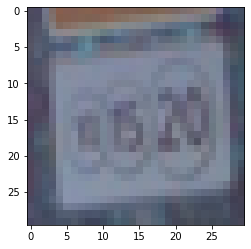

In [ ]:
test_data = []
im = Image.open(home_path+'/'+el)

r, g, b = im.split()
im = Image.merge("RGB", (b, g, r))

im = im.resize((30,30))
im = np.array(im)
test_data.append(im)

test_data = np.array(test_data)
plt.imshow(im)
plt.show()
  

In [ ]:
predictions = model.predict(test_data)

In [ ]:
classes[predictions.argmax(axis=1)[0]]

'8.8'

In [ ]:
predictions[0]

array([9.99956012e-01, 1.92356829e-12, 3.96883459e-09, 2.44383624e-09,
       3.43756246e-10, 3.25786886e-09, 3.21809814e-08, 1.07698515e-05,
       2.33130220e-13, 1.46544686e-11, 3.28751214e-13, 3.17129008e-15,
       1.63287510e-07, 1.65809415e-05, 1.47290430e-10, 5.78646109e-07,
       8.22881192e-14, 6.76531631e-09, 1.13737642e-09, 4.16314205e-10,
       2.25544738e-08, 5.84011559e-07, 1.81066440e-09, 2.43115111e-11,
       6.95110690e-13, 9.71600578e-12, 4.97343722e-10, 3.85701014e-06,
       1.11505907e-08, 5.14605247e-10, 3.49593435e-14, 1.75164753e-14,
       4.48169368e-09, 4.24638245e-08, 2.02291547e-12, 1.87583716e-11,
       1.40520972e-12, 1.18337805e-11, 5.85551152e-06, 2.86394330e-09,
       2.35811388e-08, 9.44816337e-16, 7.46973750e-12, 4.28284297e-10,
       2.39251015e-11, 3.86241483e-09, 3.74520212e-13, 3.80921694e-14,
       1.66030767e-09, 1.96759345e-11, 5.25574819e-08, 1.72190617e-08,
       2.20335461e-09, 3.52618407e-10, 8.13976513e-08, 7.73561215e-09,
      